In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import datetime
from os import listdir
from os.path import isfile, join
import glob
import re

In [ ]:
#Importação do primeiro dataset

In [2]:
dataset = pd.read_csv('fonte_HC/HC_EXAMES_1.csv', sep='|'
                     )

In [3]:
#tratamento dos dados


In [4]:
df1 = dataset.drop(['ID_aTENDIMENTO','DT_COLETA','DE_ORIGEM','DE_EXAME','CD_UNIDADE','DE_VALOR_REFERENCIA'], axis = 1)

In [5]:
df1.dropna(axis=0, how='all', subset=['DE_ANALITO', 'DE_RESULTADO'], inplace=True)

In [6]:
def corrigir_nomes(nome):
    nome = nome.replace(' :','NAN') .replace('.', '').replace('ç', 'c').replace('ó', 'o').replace('Ó', 'O').replace('é', 'e').replace('(', '').replace(' ','').replace('-','').replace(')','').replace('%','').replace(':','').replace('=','')
    return nome

def padronizar_exames(nome):
    nome = nome.replace('250HVitaminaDTotal', 'VitaminaD').replace('25HIDROXIVITAMINAD', 'VitaminaD').replace('VitaminaD,1,25Dihidroxi', 'VitaminaD').replace('25HidroxivitaminaD', 'VitaminaD').replace('Potassio,sanguetotal', 'Potassio').replace('Sodiosanguevenoso','Sodio').replace('Sodio,sangue'
,'Sodio').replace('DOSAGEMDODÍMERODQUANTITATIVO','DimeroD').replace('DETERMINAÇÃODODÍMEROD','DimeroD').replace('Coronavírus2019nCoV','Coronavirus').replace('CoronavírushumanoOC43Cor43','Coronavirus').replace('CoronavírushumanoNL63Cor63','Coronavirus').replace('CoronavírushumanoHKU1HKU','Coronavirus').replace('Coronavírushumano229ECor229','Coronavirus').replace('SODIO','Sodio').replace('POTÁSSIO','Potassio').replace('CREATININA','Creatinina')
    return nome

In [7]:
df1['DE_ANALITO'] = df1['DE_ANALITO'].apply(corrigir_nomes)
df1['DE_ANALITO'] = df1['DE_ANALITO'].apply(padronizar_exames)

In [8]:
df2 = df1.drop_duplicates(subset=['ID_PACIENTE', 'DE_ANALITO'], keep='first') 

In [10]:
df2 = df2.loc[df2['DE_ANALITO'].isin(['id_paciente','Coronavirus','PLAQUETAS','Hemoglobina','Hematocrito','Basofilos','Eosinofilos','Leucocitos','Linfocitos','Monocitos','Neutrofilos','Eritrocitos','Potassio','Sodio','PROTEÍNACREATIVAPCR','Creatinina','DimeroD','VitaminaD','pO2','SO2'])]

In [11]:
df2.set_index(['ID_PACIENTE','DE_ANALITO'], inplace=True)

In [12]:
df=df2.unstack()
df.reset_index(inplace=True)

In [13]:
df

ID_PACIENTE DE_RESULTADO                 \
DE_ANALITO                                      Basofilos    Coronavirus   
0           004056afeb7b5441855846349123f686         0.01  Não detectado   
1           0043d6c7ee042ff294b0ffd1c1cc6135         0.03  Não detectado   
2           0044c99b5e681a77b2e209149e4793e9         0.01            NaN   
3           006c3064c63e85ea03dec8a01123c38d         0.02  Não detectado   
4           00a522ffdb0f6387c00845efcc463f9e         0.03      Detectado   
...                                      ...          ...            ...   
3149        ff6357398bd33997c80a5acafbdca473         0.01      Detectado   
3150        ff806ead172ed1a039119af40854dd95         0.01  Não detectado   
3151        ff90c6bcf2a7783b5cd8b0c4bc4e30eb         0.04            NaN   
3152        ffa5689b38f4346841c37b5427a941cb         0.05      Detectado   
3153        ffe6c81dfc85873fca8a503564ad3353         0.02            NaN   

                                                                               \
DE_ANALITO Creatinina DimeroD Eosinofilos Eritrocitos Hematocrito Hemoglobina   
0                0.39    2291        0.01        3.04        25.9         9.1   
1                0.75     883        0.02        4.30        33.9        11.3   
2                2.72   37881        0.11        4.97        47.7        16.2   
3                1.03    1211        0.00        6.17        53.1        17.0   
4                0.85    3889        0.00        4.11        37.8        12.6   
...               ...     ...         ...         ...         ...         ...   
3149             1.84     685        0.00        4.88        39.9        13.9   
3150             0.76    1268        0.05        2.76        27.0         8.6   
3151             1.27    1885        0.02        3.75        34.6        11.9   
3152             2.78    3943        0.02        4.81        44.1        14.6   
3153             5.51     691        0.02        4.78        37.5        13.3   

                                                                  \
DE_ANALITO Leucocitos Linfocitos Monocitos Neutrofilos PLAQUETAS   
0                5.16       0.79      0.16        4.19       234   
1               30.51      19.02      3.18        8.26       349   
2               13.82       0.59      0.93       12.18        30   
3                5.51       1.08      0.34        4.07       306   
4                7.85       0.69      0.26        6.87       261   
...               ...        ...       ...         ...       ...   
3149            10.16       0.72      0.25        9.18       165   
3150             2.66       0.26      0.05        2.29       117   
3151             8.02       1.04      0.31        6.61       254   
3152            13.63       1.33      0.49       11.74       180   
3153             7.76       0.53      0.48        6.71       168   

                                                                       
DE_ANALITO PROTEÍNACREATIVAPCR Potassio   SO2  Sodio VitaminaD    pO2  
0                        110.6      3.9   NaN    136       NaN    NaN  
1                        185.3      4.3  97.0    134       NaN  104.0  
2                         57.4      4.8  91.2    145       NaN   67.9  
3                         58.2      4.7  92.6    144       NaN   63.2  
4                        227.7      4.1  92.6    143      23.3   69.0  
...                        ...      ...   ...    ...       ...    ...  
3149                     327.9      4.1  85.4  135.0       NaN   51.7  
3150                     372.7     3.90  81.9  134.0       NaN   46.9  
3151                     287.6      4.7  36.1    131       NaN   23.8  
3152                     349.0      4.4  98.0    138       NaN  121.0  
3153                     188.4      4.4  61.6    136       NaN   39.2  

[3154 rows x 20 columns]

In [14]:
df.columns = df.columns.droplevel()

In [15]:
df=df.rename(columns={'': 'id_paciente'})

In [16]:
dfx=df[['id_paciente','Coronavirus','PLAQUETAS','Hemoglobina','Hematocrito','Basofilos','Eosinofilos','Leucocitos','Linfocitos','Monocitos','Neutrofilos','Eritrocitos','Potassio','Sodio','PROTEÍNACREATIVAPCR','Creatinina','DimeroD','VitaminaD','pO2','SO2'
]]

In [18]:
##unindo df_date e casos na data

In [19]:
df_date=dataset[['ID_PACIENTE','DT_COLETA']]
df_date = df_date.drop_duplicates(subset=['ID_PACIENTE', 'DT_COLETA'], keep='first') 
df_date['DT_COLETA'] = pd.to_datetime(df_date['DT_COLETA'])
df_date_temp=df_date['DT_semana_anterior'] = df_date['DT_COLETA']-datetime.timedelta(days=7)
df_date['DT_semana_anterior'] = df_date_temp
df_date = df_date.drop_duplicates(subset=['ID_PACIENTE'], keep='first') 
df_date

,ID_PACIENTE,DT_COLETA,DT_semana_anterior
0,004056afeb7b5441855846349123f686,2020-05-17,2020-05-10
155,01bc5254c81abd55a9890c39ecc4b7bf,2020-06-03,2020-05-27
259,01e84c3319ab9f93a5a804d028d32b91,2020-04-08,2020-04-01
381,01f0f02508b152ff612111bd74aec7d7,2020-04-20,2020-04-13
686,024fcd14fed1d2e9ded408f4eebf243e,2020-05-30,2020-05-23
...,...,...,...
2495036,fcdda66d6acfa3420fe03d288245696f,2020-04-03,2020-03-27
2495106,fe180c085d3042263b17da5a595abe80,2020-08-31,2020-08-24
2495188,ff025359cf11d0e05e95bd27dda29833,2020-05-20,2020-05-13
2496283,ff2263fd2e918629b7b0d3f8985e4f47,2020-06-04,2020-05-28


In [ ]:
#Importanto segundo dataset

In [ ]:
covid = pd.read_csv('./caso_full.csv')

In [ ]:
##tratamento dos dados

In [20]:
covid_temp=covid['(casos/população)x1000'] = covid['new_confirmed']*1000/covid['estimated_population']
                                                   
covid['(casos/população)x1000'] = covid_temp

casos_covid=covid[['city','date','(casos/população)x1000']]

In [21]:
covid.isnull().sum()

city                                             12397
city_ibge_code                                    8212
date                                                 0
epidemiological_week                                 0
estimated_population                              8212
estimated_population_2019                         8212
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    23731
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
(casos/pop

In [22]:
casos_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247472 entries, 0 to 2247471
Data columns (total 3 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   city                    object 
 1   date                    object 
 2   (casos/população)x1000  float64
dtypes: float64(1), object(2)
memory usage: 51.4+ MB


In [22]:
casos_covid['date'] = pd.to_datetime(casos_covid['date'])

<ipython-input-22-8844106da592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_covid['date'] = pd.to_datetime(casos_covid['date'])


In [24]:
casos_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247472 entries, 0 to 2247471
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   city                    object        
 1   date                    datetime64[ns]
 2   (casos/população)x1000  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.4+ MB


In [25]:
##join tabela paciente para descobrir idade e cidade

In [ ]:
###Importação terceiro dataset

In [23]:
paciente=pd.read_csv('./fonte_HC/HC_PACIENTES_1.csv', sep='|')

In [24]:
paciente = paciente.drop(['CD_CEPREDUZIDO','CD_UF','CD_PAIS'], axis = 1)

In [28]:
paciente

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_MUNICIPIO
0,9698838a8fa8a01ffd5ed5c71e8e17a3,F,1962,SAO PAULO
1,d9fec23b3820f93a961841d569db8cb5,F,1974,MMMM
2,ee507ba3a9959fdf31bca52852fd5715,F,1962,MMMM
3,51590e8c53f4e8e332c05d7e6cee35c7,F,1960,SAO PAULO
4,13699f0f7714fdaba277c5e360c6869c,M,1967,MMMM
...,...,...,...,...
3746,53ee0112b48d38f1c016474647ee90ad,M,1979,SAO PAULO
3747,5cbfd07d3053d3c984ca11041e9fb844,M,1966,SAO PAULO
3748,03e3c755573c3c26c626b1bfd042355b,F,1966,SAO PAULO
3749,4c74c42096e0a87f419f201923965d76,M,1955,SAO PAULO


In [25]:
df4 = pd.merge(paciente, df_date,  how='left', on=['ID_PACIENTE'])

In [30]:
df4

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_MUNICIPIO,DT_COLETA,DT_semana_anterior
0,9698838a8fa8a01ffd5ed5c71e8e17a3,F,1962,SAO PAULO,2020-04-07,2020-03-31
1,d9fec23b3820f93a961841d569db8cb5,F,1974,MMMM,NaT,NaT
2,ee507ba3a9959fdf31bca52852fd5715,F,1962,MMMM,NaT,NaT
3,51590e8c53f4e8e332c05d7e6cee35c7,F,1960,SAO PAULO,2020-04-22,2020-04-15
4,13699f0f7714fdaba277c5e360c6869c,M,1967,MMMM,2020-04-12,2020-04-05
...,...,...,...,...,...,...
3746,53ee0112b48d38f1c016474647ee90ad,M,1979,SAO PAULO,NaT,NaT
3747,5cbfd07d3053d3c984ca11041e9fb844,M,1966,SAO PAULO,2020-05-23,2020-05-16
3748,03e3c755573c3c26c626b1bfd042355b,F,1966,SAO PAULO,2020-06-23,2020-06-16
3749,4c74c42096e0a87f419f201923965d76,M,1955,SAO PAULO,NaT,NaT


In [26]:
df5 = pd.merge(df4, casos_covid,  how='left', left_on=['DT_semana_anterior','CD_MUNICIPIO'], right_on = ['date','city'])

In [27]:
casos_covid.dropna(axis=0, how='any', subset=['city', 'date','(casos/população)x1000'], inplace=True)

<ipython-input-27-50d039a25fd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_covid.dropna(axis=0, how='any', subset=['city', 'date','(casos/população)x1000'], inplace=True)


In [34]:
casos_covid.isnull().sum()

city                      0
date                      0
(casos/população)x1000    0
dtype: int64

In [28]:
casos_covid['city']=casos_covid['city'].apply(lambda x: x.upper())

<ipython-input-28-06318979539f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_covid['city']=casos_covid['city'].apply(lambda x: x.upper())


In [29]:
def retirar_acentos(nome):
    nome = nome.replace('Á','A').replace('É', 'E').replace('Í', 'I').replace('Ó', 'O').replace('Ú', 'U').replace('Ã', 'A').replace('Â', 'A').replace('Ô','O').replace('Ü','U')
    return nome
casos_covid['city'] = casos_covid['city'].apply(retirar_acentos)

<ipython-input-29-d0be5f1882b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_covid['city'] = casos_covid['city'].apply(retirar_acentos)


In [30]:
df5 = pd.merge(df4, casos_covid,  how='left', left_on=['DT_semana_anterior','CD_MUNICIPIO'], right_on = ['date','city'])

In [31]:
df5=df5.dropna()

In [32]:
df5 = df5.drop(['CD_MUNICIPIO','DT_COLETA','city','date','DT_semana_anterior'], axis = 1)

In [33]:
df5=df5.rename(columns={'(casos/população)x1000': '(casos/pop)x1000_7_ dias_antes_internacao'})

In [42]:
df5

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,(casos/pop)x1000_7_ dias_antes_internacao
0,9698838a8fa8a01ffd5ed5c71e8e17a3,F,1962,0.052900
3,51590e8c53f4e8e332c05d7e6cee35c7,F,1960,0.085921
5,9bd839fe149857321685b1e1d8a55cbd,F,1948,0.043326
8,c4c63fb16c76294e82b33632ce4636bd,F,1960,0.015334
11,e5ec12c8602de4f06b11444c34edb44c,F,1978,0.280319
...,...,...,...,...
3744,333e26274dad0cac66dfdfadcfa61b16,M,1970,0.014361
3745,8724014041bb9f51d8a37b1f10d58706,M,1991,0.233505
3747,5cbfd07d3053d3c984ca11041e9fb844,M,1966,0.116590
3748,03e3c755573c3c26c626b1bfd042355b,F,1966,0.343036


In [43]:
###unindo as tabelas de exames e de dados pessoais e contextuais

In [34]:
df_final = pd.merge(df5, dfx,  how='left', left_on=['ID_PACIENTE'], right_on = ['id_paciente'])

In [35]:
df_final = df_final.drop(['id_paciente'], axis = 1)

In [46]:
df_final.head(50)

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,(casos/pop)x1000_7_ dias_antes_internacao,Coronavirus,PLAQUETAS,Hemoglobina,Hematocrito,Basofilos,Eosinofilos,...,Neutrofilos,Eritrocitos,Potassio,Sodio,PROTEÍNACREATIVAPCR,Creatinina,DimeroD,VitaminaD,pO2,SO2
0,9698838a8fa8a01ffd5ed5c71e8e17a3,F,1962,0.052900,Detectado,197,13.9,40.5,0.01,0.02,...,1.85,4.50,4.5,141,29.5,0.97,< 190,NaN,NaN,NaN
1,51590e8c53f4e8e332c05d7e6cee35c7,F,1960,0.085921,Detectado,188,7.6,22.6,0.02,0.05,...,7.03,2.55,3.90,137.0,240.4,3.21,NaN,NaN,83.9,97.1
2,9bd839fe149857321685b1e1d8a55cbd,F,1948,0.043326,Detectado,223,12.0,35.7,0.01,0.00,...,3.57,4.06,5.0,136.0,79.8,0.70,682,NaN,32.4,56.3
3,c4c63fb16c76294e82b33632ce4636bd,F,1960,0.015334,Não detectado,202,14.0,42.5,0.02,0.01,...,10.35,5.31,4.2,140,113.2,0.92,776,NaN,62.5,90.6
4,e5ec12c8602de4f06b11444c34edb44c,F,1978,0.280319,Detectado,242,13.6,39.6,0.00,0.08,...,4.48,4.98,3.7,139.0,57.8,0.62,223,NaN,47.9,82.0
5,4ca1097f8f6b3fab8f0ab9111af027da,M,1984,0.019472,Detectado,108,19.2,58.0,0.02,0.03,...,2.27,6.12,4.5,141,22.2,1.28,606,NaN,NaN,NaN
6,ad760c78185a3ef1e99f2d848cdbe579,M,1955,0.105312,Detectado,231,10.4,28.2,0.01,0.18,...,8.06,3.37,3.50,136.0,117.7,1.07,4655,NaN,86.9,97.2
7,66e32f6ce0e5e02224cbc9e519cdabc3,M,1948,0.032210,Não detectado,226,13.3,41.0,0.04,0.08,...,3.59,4.79,4.0,143,43.5,0.95,13884,NaN,54.9,90.1
8,8b867b22880191cca3caa13383e316b8,M,1945,0.073264,Detectado,113,13.9,40.8,0.0,0.0,...,2.5,4.38,4.30,131.0,25.5,0.97,1261,NaN,35.8,64.1
9,bc94c91edc94ec8e8286f791ad1d78e9,M,1942,0.011927,Não detectado,229,12.4,36.5,0.00,0.00,...,4.52,4.03,3.8,141,111.4,0.65,NaN,NaN,NaN,NaN


In [39]:
def padronizar_resultados(nome):
    nome = nome.replace('Detectado', '1').replace('Não detectado', '0').replace('Inconclusivo', '').replace('< 190', '189').replace('?', '').replace('?.....', '').replace('> 128.000', '128.001').replace('Inválido', '').replace('*', '').replace('PLAQUETAS AGREGADAS', '').replace('<1.5', '1').replace('> 10', '11').replace('>10', '11').replace('> 10.0', '11').replace('<0.17', '0.16').replace('FAILED', '').replace('< 4.0', '3.0').replace('?95.1', '95.1').replace('?89.3', '89.3').replace('AAAA', '').replace('F', '1').replace('M', '0')
 
    return nome

In [40]:
df_final = df_final.apply(padronizar_resultados)

In [49]:
df_final

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,(casos/pop)x1000_7_ dias_antes_internacao,Coronavirus,PLAQUETAS,Hemoglobina,Hematocrito,Basofilos,Eosinofilos,...,Neutrofilos,Eritrocitos,Potassio,Sodio,PROTEÍNACREATIVAPCR,Creatinina,DimeroD,VitaminaD,pO2,SO2
0,9698838a8fa8a01ffd5ed5c71e8e17a3,1,1962,0.052900,1,197,13.9,40.5,0.01,0.02,...,1.85,4.50,4.5,141,29.5,0.97,189,NaN,NaN,NaN
1,51590e8c53f4e8e332c05d7e6cee35c7,1,1960,0.085921,1,188,7.6,22.6,0.02,0.05,...,7.03,2.55,3.90,137.0,240.4,3.21,NaN,NaN,83.9,97.1
2,9bd839fe149857321685b1e1d8a55cbd,1,1948,0.043326,1,223,12.0,35.7,0.01,0.00,...,3.57,4.06,5.0,136.0,79.8,0.70,682,NaN,32.4,56.3
3,c4c63fb16c76294e82b33632ce4636bd,1,1960,0.015334,0,202,14.0,42.5,0.02,0.01,...,10.35,5.31,4.2,140,113.2,0.92,776,NaN,62.5,90.6
4,e5ec12c8602de4f06b11444c34edb44c,1,1978,0.280319,1,242,13.6,39.6,0.00,0.08,...,4.48,4.98,3.7,139.0,57.8,0.62,223,NaN,47.9,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,333e26274dad0cac66dfdfadcfa61b16,0,1970,0.014361,0,158,12.8,38.6,0.01,0.04,...,4.97,4.65,4.5,136,76.7,1.78,2656,24.5,23.6,30.1
1807,8724014041bb9f51d8a37b1f10d58706,0,1991,0.233505,0,214,13.0,37.5,0.04,0.05,...,5.54,4.40,4.2,145,89.7,2.13,794,NaN,60.1,93.5
1808,5cbfd07d3053d3c984ca11041e9fb844,0,1966,0.116590,NaN,226,11.9,34.7,0.02,0.04,...,6.17,4.01,4.3,138.0,199.9,0.93,838,NaN,41.6,77.0
1809,03e3c755573c3c26c626b1bfd042355b,1,1966,0.343036,1,254,11.5,35.0,0.04,0.10,...,5.50,4.12,5.0,134,178.4,1.76,767,NaN,56.1,86.5


In [50]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1811 entries, 0 to 1810
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID_PACIENTE                                1811 non-null   object 
 1   IC_SEXO                                    1811 non-null   object 
 2   AA_NASCIMENTO                              1811 non-null   object 
 3   (casos/pop)x1000_7_ dias_antes_internacao  1811 non-null   float64
 4   Coronavirus                                1498 non-null   object 
 5   PLAQUETAS                                  1786 non-null   object 
 6   Hemoglobina                                1786 non-null   object 
 7   Hematocrito                                1786 non-null   object 
 8   Basofilos                                  1785 non-null   object 
 9   Eosinofilos                                1785 non-null   object 
 10  Leucocitos              

In [51]:
df_final.isnull().sum()

ID_PACIENTE                                     0
IC_SEXO                                         0
AA_NASCIMENTO                                   0
(casos/pop)x1000_7_ dias_antes_internacao       0
Coronavirus                                   313
PLAQUETAS                                      25
Hemoglobina                                    25
Hematocrito                                    25
Basofilos                                      26
Eosinofilos                                    26
Leucocitos                                     25
Linfocitos                                     26
Monocitos                                      26
Neutrofilos                                    26
Eritrocitos                                    25
Potassio                                       35
Sodio                                          37
PROTEÍNACREATIVAPCR                            87
Creatinina                                     30
DimeroD                                       221


In [41]:
df_final=df_final.replace(r'', np.NaN)
df_final.dropna(axis=0, how='any', subset=['AA_NASCIMENTO'], inplace=True)
df_final['AA_NASCIMENTO'] = df_final['AA_NASCIMENTO'].astype(int)
df_final_temp=df_final['AA_NASCIMENTO']=2021-df_final['AA_NASCIMENTO']
df_final['AA_NASCIMENTO']=df_final_temp

In [42]:
df_final.dropna(axis=0, how='any', subset=['Coronavirus'], inplace=True)

In [43]:
df_final['Coronavirus'] = df_final['Coronavirus'].astype(int)
df_final['PLAQUETAS'] = df_final['PLAQUETAS'].astype(float)
df_final['Hemoglobina'] = df_final['Hemoglobina'].astype(float)
df_final['Hematocrito'] = df_final['Hematocrito'].astype(float)
df_final['Basofilos'] = df_final['Basofilos'].astype(float)
df_final['Eosinofilos'] = df_final['Eosinofilos'].astype(float)
df_final['Leucocitos'] = df_final['Leucocitos'].astype(float)
df_final['Linfocitos'] = df_final['Linfocitos'].astype(float)
df_final['Monocitos'] = df_final['Monocitos'].astype(float)
df_final['Neutrofilos'] = df_final['Neutrofilos'].astype(float)
df_final['Eritrocitos'] = df_final['Eritrocitos'].astype(float)
df_final['Potassio'] = df_final['Potassio'].astype(float)
df_final['Sodio'] = df_final['Sodio'].astype(float)
df_final['PROTEÍNACREATIVAPCR'] = df_final['PROTEÍNACREATIVAPCR'].astype(float)
df_final['Creatinina'] = df_final['Creatinina'].astype(float)
df_final['DimeroD'] = df_final['DimeroD'].astype(float)
df_final['VitaminaD'] = df_final['VitaminaD'].astype(float)
df_final['pO2'] = df_final['pO2'].astype(float)
df_final['SO2'] = df_final['SO2'].astype(float)


# exploração dos dados



In [56]:
## Qual proporção da população possui COVID-19?


In [44]:
label = 'Coronavirus'

In [45]:
ref = df_final[label].mean()

print(f'Percentual de Covid-19 positivos no dataset: {round(ref*100)}%')


Percentual de Covid-19 positivos no dataset: 49%


In [ ]:
#análises gráficas

C:\Users\dalmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


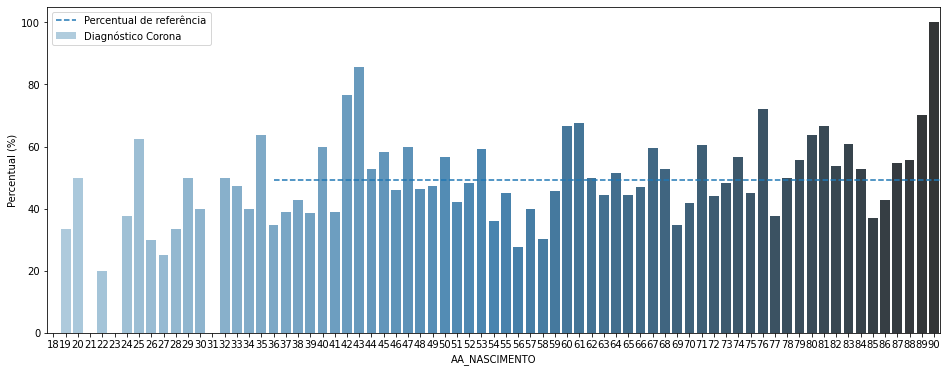

In [59]:
#   plt.figure()
plt.figure(figsize=(16, 6))
    
    # plot dashed reference line
dat = df_final.groupby('AA_NASCIMENTO').count().reset_index()
x = list(dat['AA_NASCIMENTO'])
y = [ref*100] * len(x)
ax = sns.lineplot(x, y, label='Percentual de referência')
ax.lines[0].set_linestyle("--")

    # Plot the percentages
sns.set_color_codes('pastel')
dat = df_final.groupby('AA_NASCIMENTO').mean().reset_index()
dat['Coronavirus'] = dat['Coronavirus'] * 100
sns.barplot(x='AA_NASCIMENTO', y=label, label='Diagnóstico Corona', data=dat, palette="Blues_d")
 

plt.legend()
plt.ylabel('Percentual (%)')
samples = df_final.groupby('AA_NASCIMENTO')['Coronavirus'].count().sum()


        


In [46]:
data=df_final

In [47]:
features=['PLAQUETAS',
 'Linfocitos',
 'Creatinina',
 'VitaminaD',
 'Hematocrito',
 'PROTEÍNACREATIVAPCR',
 'Sodio',
 'IC_SEXO',
 'Hemoglobina',
 'Basofilos',
 'Neutrofilos',
 'SO2',
 'Leucocitos',
 'Eosinofilos',
 '(casos/pop)x1000_7_ dias_antes_internacao',
 'AA_NASCIMENTO',
 'Monocitos',
 'Eritrocitos',
 'Potassio',
 'pO2',
 'DimeroD']


C:\Users\dalmi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dalmi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dalmi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

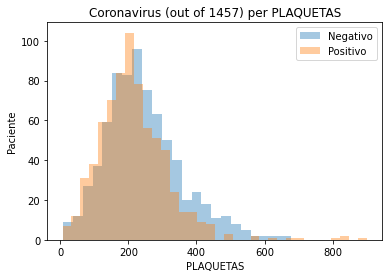

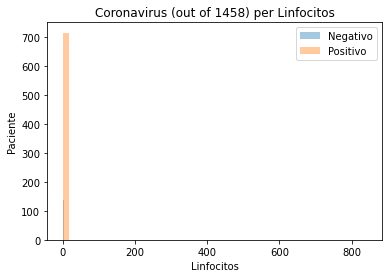

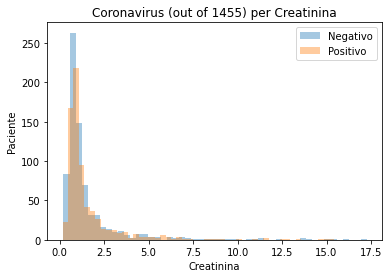

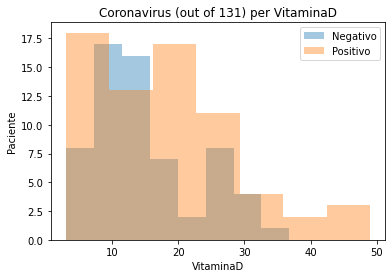

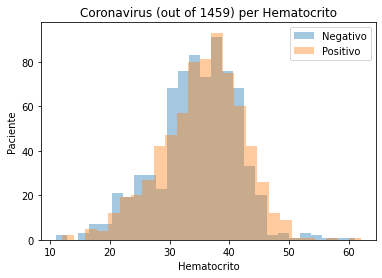

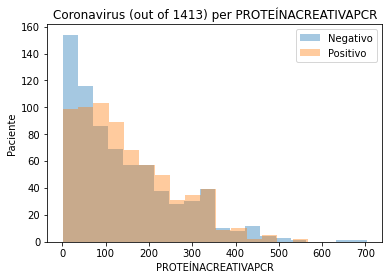

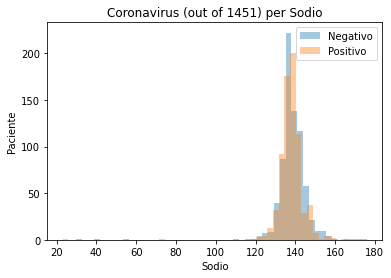

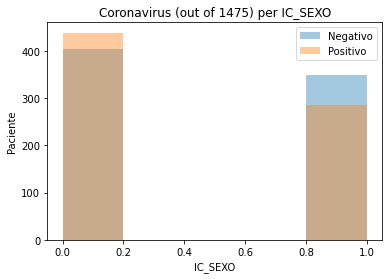

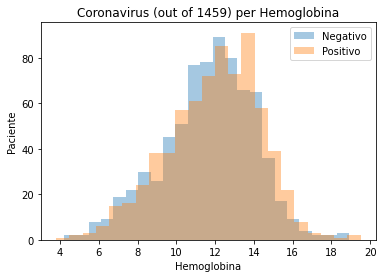

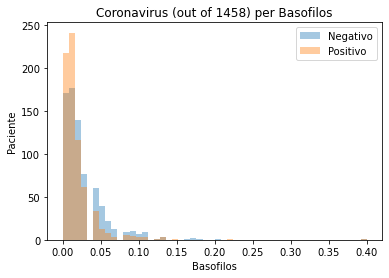

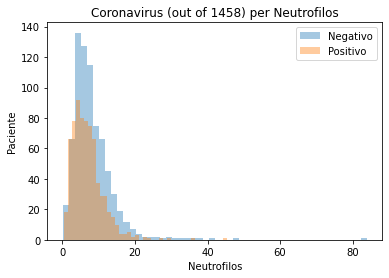

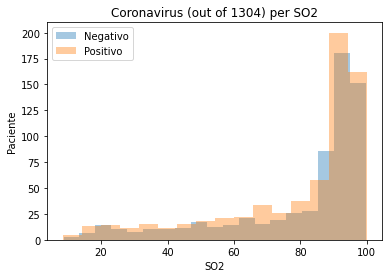

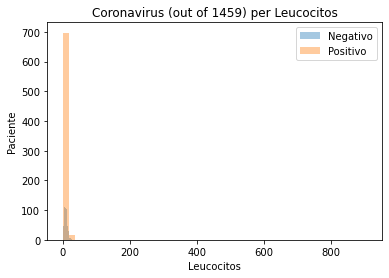

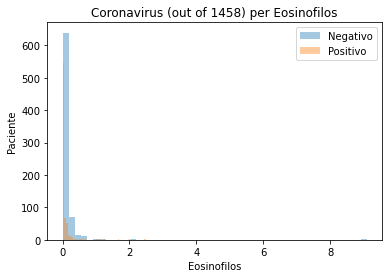

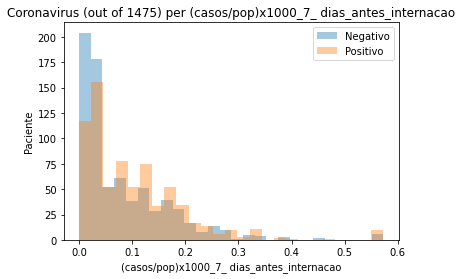

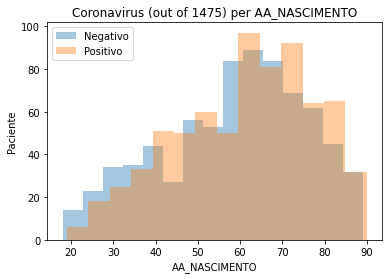

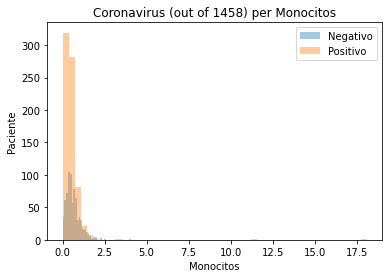

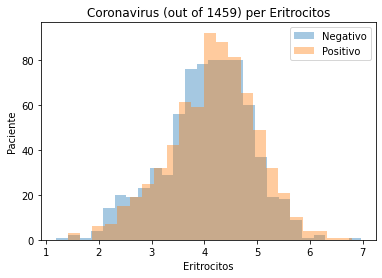

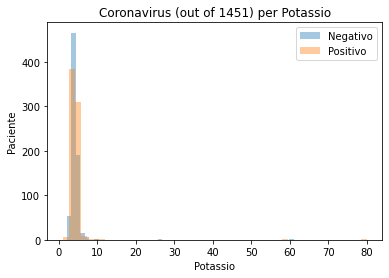

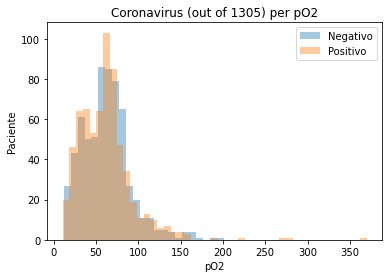

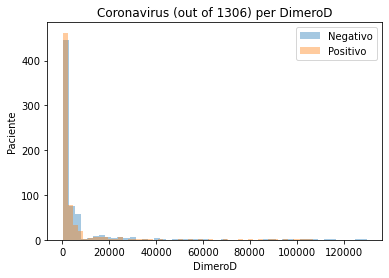

In [62]:
def plot_numerical(data, feature, label, save=False):
    plt.figure()
    hues = list(set(df_final['Coronavirus']))
    for hue in hues:
        sns.distplot(df_final[feature][df_final['Coronavirus']==hue].values, kde=False)

        
    hues = ['Negativo' if hue==0 else 'Positivo' if hue==1 else hue for hue in hues]
    plt.legend(hues)
    plt.xlabel(feature)
    plt.ylabel('Paciente')
    samples = data.groupby(feature)[label].count().sum()
    plt.title(f'{label} (out of {samples}) per {feature}')
    if save: plt.savefig(f'./plots/{label}/{label}_per_{feature.replace("/","_")}.png')
    

for feature in features:
    plot_numerical(data, feature, label)

In [63]:
#graficos dispersão


Text(0.5, 1.0, 'Clusters PLAQUETAS-Creatinina')

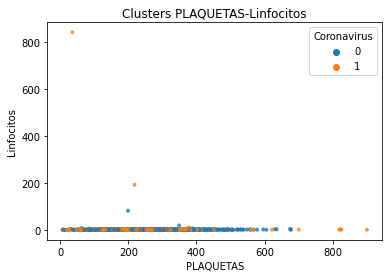

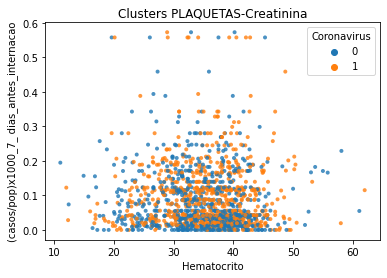

In [64]:
plt.figure()
sns.scatterplot(x=features[0], y=features[1], hue=label, data=df_final, 
                  linewidth=0, s=16, alpha = 0.8)
plt.title(f'Clusters {features[0]}-{features[1]}')

plt.figure()
sns.scatterplot(x=features[4], y=features[14], hue=label, data=df_final, 
                  linewidth=0, s=16, alpha = 0.8)
plt.title(f'Clusters {features[0]}-{features[2]}')



In [ ]:
##consultando e excluino valor de outliers em contagem de linfócitos

In [48]:
max(df_final['Linfocitos'])

842.4

In [49]:
df_final=df_final.replace(842.4,np.NaN).replace(192.63,np.NaN).replace(81.71,np.NaN)

In [50]:
df_final


,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,(casos/pop)x1000_7_ dias_antes_internacao,Coronavirus,PLAQUETAS,Hemoglobina,Hematocrito,Basofilos,Eosinofilos,...,Neutrofilos,Eritrocitos,Potassio,Sodio,PROTEÍNACREATIVAPCR,Creatinina,DimeroD,VitaminaD,pO2,SO2
0,9698838a8fa8a01ffd5ed5c71e8e17a3,1,59,0.052900,1,197.0,13.9,40.5,0.01,0.02,...,1.85,4.50,4.5,141.0,29.5,0.97,189.0,NaN,NaN,NaN
1,51590e8c53f4e8e332c05d7e6cee35c7,1,61,0.085921,1,188.0,7.6,22.6,0.02,0.05,...,7.03,2.55,3.9,137.0,240.4,3.21,NaN,NaN,83.9,97.1
2,9bd839fe149857321685b1e1d8a55cbd,1,73,0.043326,1,223.0,12.0,35.7,0.01,0.00,...,3.57,4.06,5.0,136.0,79.8,0.70,682.0,NaN,32.4,56.3
3,c4c63fb16c76294e82b33632ce4636bd,1,61,0.015334,0,202.0,14.0,42.5,0.02,0.01,...,10.35,5.31,4.2,140.0,113.2,0.92,776.0,NaN,62.5,90.6
4,e5ec12c8602de4f06b11444c34edb44c,1,43,0.280319,1,242.0,13.6,39.6,0.00,0.08,...,4.48,4.98,3.7,139.0,57.8,0.62,223.0,NaN,47.9,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,9ed421e49d8add20a08cb6d5923c61b5,1,23,0.021176,0,208.0,10.9,32.1,0.03,0.07,...,5.68,3.84,4.4,145.0,14.1,0.39,1361.0,NaN,NaN,NaN
1806,333e26274dad0cac66dfdfadcfa61b16,0,51,0.014361,0,158.0,12.8,38.6,0.01,0.04,...,4.97,4.65,4.5,136.0,76.7,1.78,2656.0,24.5,23.6,30.1
1807,8724014041bb9f51d8a37b1f10d58706,0,30,0.233505,0,214.0,13.0,37.5,0.04,0.05,...,5.54,4.40,4.2,145.0,89.7,2.13,794.0,NaN,60.1,93.5
1809,03e3c755573c3c26c626b1bfd042355b,1,55,0.343036,1,254.0,11.5,35.0,0.04,0.10,...,5.50,4.12,5.0,134.0,178.4,1.76,767.0,NaN,56.1,86.5


Text(0.5, 1.0, 'Clusters PLAQUETAS-Linfocitos')

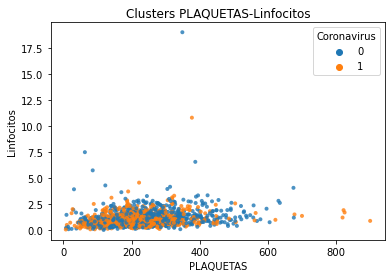

In [68]:
plt.figure()
sns.scatterplot(x=features[0], y=features[1], hue=label, data=df_final, 
                  linewidth=0, s=16, alpha = 0.8)
plt.title(f'Clusters {features[0]}-{features[1]}')


Text(0.5, 1.0, 'Clusters Creatinina-VitaminaD')

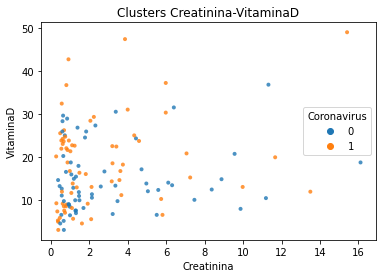

In [69]:
plt.figure()
sns.scatterplot(x=features[2], y=features[3], hue=label, data=df_final, 
                  linewidth=0, s=16, alpha = 0.8)
plt.title(f'Clusters {features[2]}-{features[3]}')

Text(0.5, 1.0, 'Clusters Basofilos-Hemoglobina')

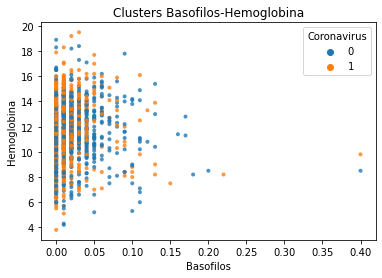

In [70]:
plt.figure()
sns.scatterplot(x=features[9], y=features[8], hue=label, data=df_final, 
                  linewidth=0, s=16, alpha = 0.8)
plt.title(f'Clusters {features[9]}-{features[8]}')

In [ ]:
#CRIANDO MODELO

In [55]:
df_final=df_final.fillna(df_final.mean())

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = df_final[features].values
y = df_final[label].values

X = scaler.fit_transform(X)

print(X.min(), X.max())
print(X)

0.0 1.0000000000000002
[[0.21276596 0.07623554 0.04734074 ... 0.0443038  0.14362955 0.00046977]
 [0.20268757 0.02313354 0.17825833 ... 0.03670886 0.20395103 0.04359763]
 [0.2418813  0.06572029 0.03156049 ... 0.05063291 0.06065665 0.00426649]
 ...
 [0.23180291 0.10988433 0.11513735 ... 0.04050633 0.13772955 0.00512903]
 [0.27659574 0.01472135 0.09351257 ... 0.05063291 0.12659989 0.00492109]
 [0.24524076 0.05205047 0.03389831 ... 0.03417722 0.17584864 0.01336167]]


In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

test_ratio = .1

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=test_ratio, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(1327, 21)
(148, 21)


In [58]:
#Naïve Classifier performance as benchmark.

In [1]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, fbeta_score

avg = y_train.mean()
avg_int = round(avg)

y_naive = [avg] * len(y_test)
y_naive_int = [avg_int] * len(y_test)

score_naive = mean_absolute_error(y_test, y_naive)
score_naive_int = mean_absolute_error(y_test, y_naive_int)

print(f'Score de predição naive: {score_naive_int} ({score_naive})')


NameError: name 'y_train' is not defined

In [60]:
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

models = [
    RidgeClassifier(),
    RidgeClassifierCV(),
    Perceptron(),
    KNeighborsClassifier(2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    DecisionTreeClassifier(max_depth=6),
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(),
    RandomForestClassifier(max_depth=7, n_estimators=100),
    RandomForestClassifier(n_estimators=30, max_depth=20, random_state=0, max_features='sqrt',\
                            class_weight='balanced'),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),]

best_score = 999

X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=test_ratio, shuffle=True)

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = mean_absolute_error(y_test, y_pred)

    if score < best_score:
        best_model = model
        best_score = score
        
    model_class = str(model.__class__).split('.')[-1][:-2]
    print(f'{score}\t{model_class}')

0.2702702702702703	RidgeClassifier
0.2972972972972973	RidgeClassifierCV
0.4797297297297297	Perceptron
0.4594594594594595	KNeighborsClassifier
0.36486486486486486	GaussianProcessClassifier
0.36486486486486486	DecisionTreeClassifier
0.35135135135135137	DecisionTreeClassifier
0.3310810810810811	DecisionTreeClassifier
0.28378378378378377	RandomForestClassifier
0.2972972972972973	RandomForestClassifier
0.2635135135135135	RandomForestClassifier
0.2972972972972973	MLPClassifier
0.3716216216216216	AdaBoostClassifier


In [61]:
   from sklearn import metrics


In [65]:
    ##TESTE
    decision_tree=   model
    decision_tree.fit(X_train, y_train)
    decision_tree =  decision_tree.predict(X_test)
   
    print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(decision_tree,y_test))

The accuracy of the Random Forests model is :	 0.7364864864864865


Falso Positivos: 35.9%
Falso Negativos: 15.7%


Text(33.0, 0.5, 'Predito')

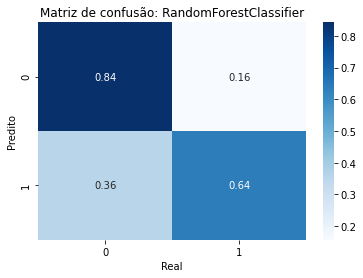

In [64]:
from sklearn.metrics import confusion_matrix

model = best_model

y_pred = model.predict(X_test)
all_labels = list(set(y_test))
CM = confusion_matrix(y_test, y_pred, labels=all_labels)
CM = CM / CM.sum(axis=1, keepdims=True)

CM = pd.DataFrame(CM, index=all_labels, columns=all_labels)

FN = CM.values[0,1] / CM.values[0,:].sum()
FP = CM.values[1,0] / CM.values[1,:].sum()
N  = sum(y_pred==0)
n_test = len(y_test)

print(f'Falso Positivos: {round(FP*100,1)}%')
print(f'Falso Negativos: {round(FN*100,1)}%')
 
plt.figure()
sns.heatmap(CM, annot=True, cmap="Blues")
model_class = str(model.__class__).split('.')[-1][:-2]
plt.title(f'Matriz de confusão: {model_class}')
plt.xlabel('Real')
plt.ylabel('Predito')

In [66]:
import numpy as np

n_cross_valid = 599
    
n_test = len(y_test)

FP = []
FN = []
NN = []
CM = np.zeros((2,2))

for i in range(n_cross_valid):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=0.5, shuffle=True)


    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    CM = confusion_matrix(y_test, y_pred, labels=[0, 1])
    if (CM[:,1].sum() > 0):
        FN.append(CM[0,1] / CM[0,:].sum())
        FP.append(CM[1,0] / CM[1,:].sum())
        NN.append(CM[0,:].sum() / CM.sum())
    

print(f'Falso Positivos: {round(np.mean(FP)*100,1)}% +- {round(np.std(FP, ddof=1)*100,1)}%')
print(f'Falso Negativos: {round(np.mean(FN)*100,1)}% +- {round(np.std(FN, ddof=1)*100,1)}%')


Falso Positivos: 42.2% +- 4.0%
Falso Negativos: 32.7% +- 3.7%


In [67]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [68]:
#df_final.to_excel('df_final.xlsx')
import shap

In [69]:
# Probabilidade de predição do conjunto de treino
y_pred_train_proba = model.predict_proba(X_train)

# Vamos agora selecionar um resultado que previu como positivo
print('Probabilidade do modelo prever negativo -',100*y_pred_train_proba[15][0].round(2),'%.')
print('Probabilidade do modelo prever positivo -',100*y_pred_train_proba[15][1].round(2),'%.')

Probabilidade do modelo prever negativo - 4.0 %.
Probabilidade do modelo prever positivo - 96.0 %.


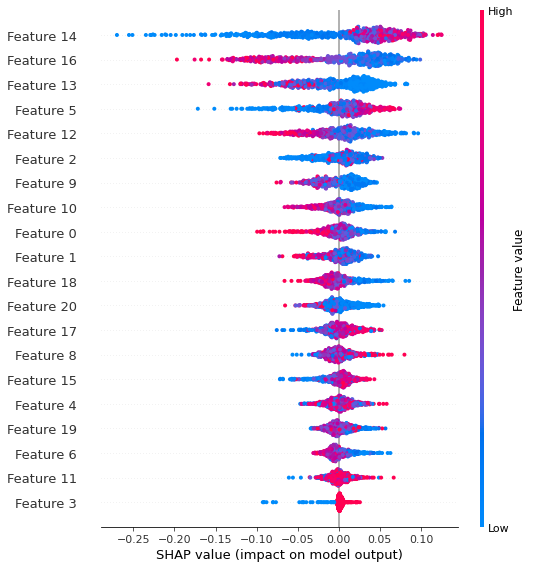

In [72]:
shap.summary_plot(shap_values[1], X_test)

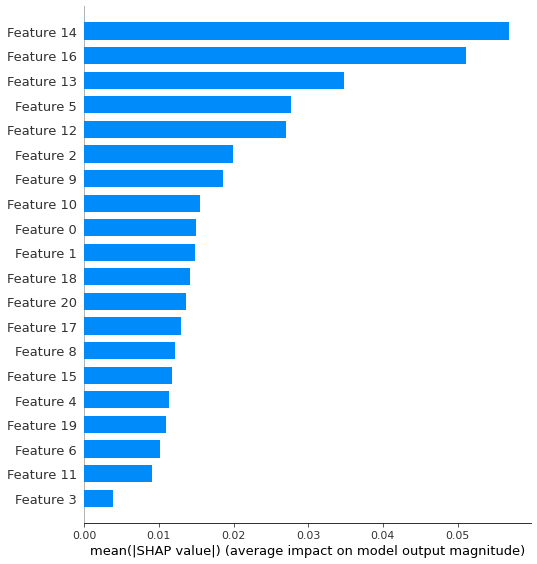

In [73]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

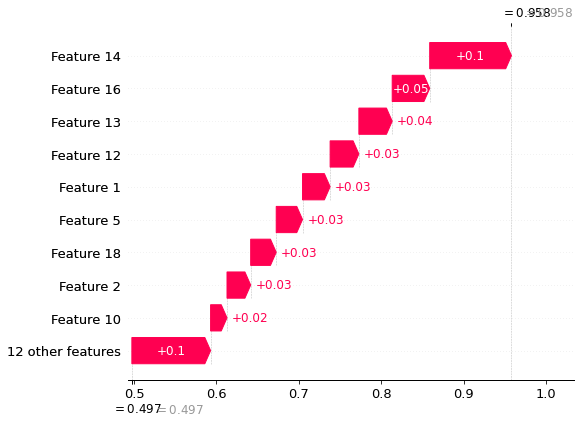

In [74]:
expected_value = explainer.expected_value
shap_values_train = explainer.shap_values(X_train, y_train)
shap.plots._waterfall.waterfall_legacy(expected_value=expected_value[0], shap_values=shap_values_train[1][15].reshape(-1),  show=True)